# Dados e Aprendizagem Automática, MEI/MIEInf, UMinho 2022/23

In [1]:
import pandas as pandas 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import xgboost as xgb

sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)

from scipy import stats

from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

c:\Users\Utilizador\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Descrição do Dataset

### Objetivo

Feita uma análise ao dataset pode-se concluir que o atributo que é necessário utilizar para que o modelo seja capaz de prever o custo de habitação dos USA é o **price**.

## Processamento de Dados

In [2]:
data = pandas.read_csv('../../Datasets/Housing/training_data.csv')
test = pandas.read_csv('../../Datasets/Housing/test_data.csv')

### Data information

In [3]:
print("TRAINING DATASET")
data.head()

TRAINING DATASET


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print("TESTING DATASET")
test.head()

TESTING DATASET


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### Total Information

In [5]:
data.shape, test.shape

((1460, 81), (1459, 80))

Uma vez que a variável *SalePrice* está presente no *train dataset* mas não no *test dataset*, será então essa a variável que terá de ser prevista

Verificando todas as colunas disponíveis no *train datset*

In [6]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Descrição do Train Dataset

In [7]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Informação do Train dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Correlação das restantes variáveis com target variable (SalePrice)

In [9]:
corr = data.corr()["SalePrice"]
corr[np.argsort(corr, axis=0)[::-1]]

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

Como é possível observar, a maior parte de variável tem correlação positiva com a *target variable*.

Estas vão ser as mais importantes para a sua previsão.

Text(0.5, 1.0, 'Correlação entre variáveis e Sale Price')

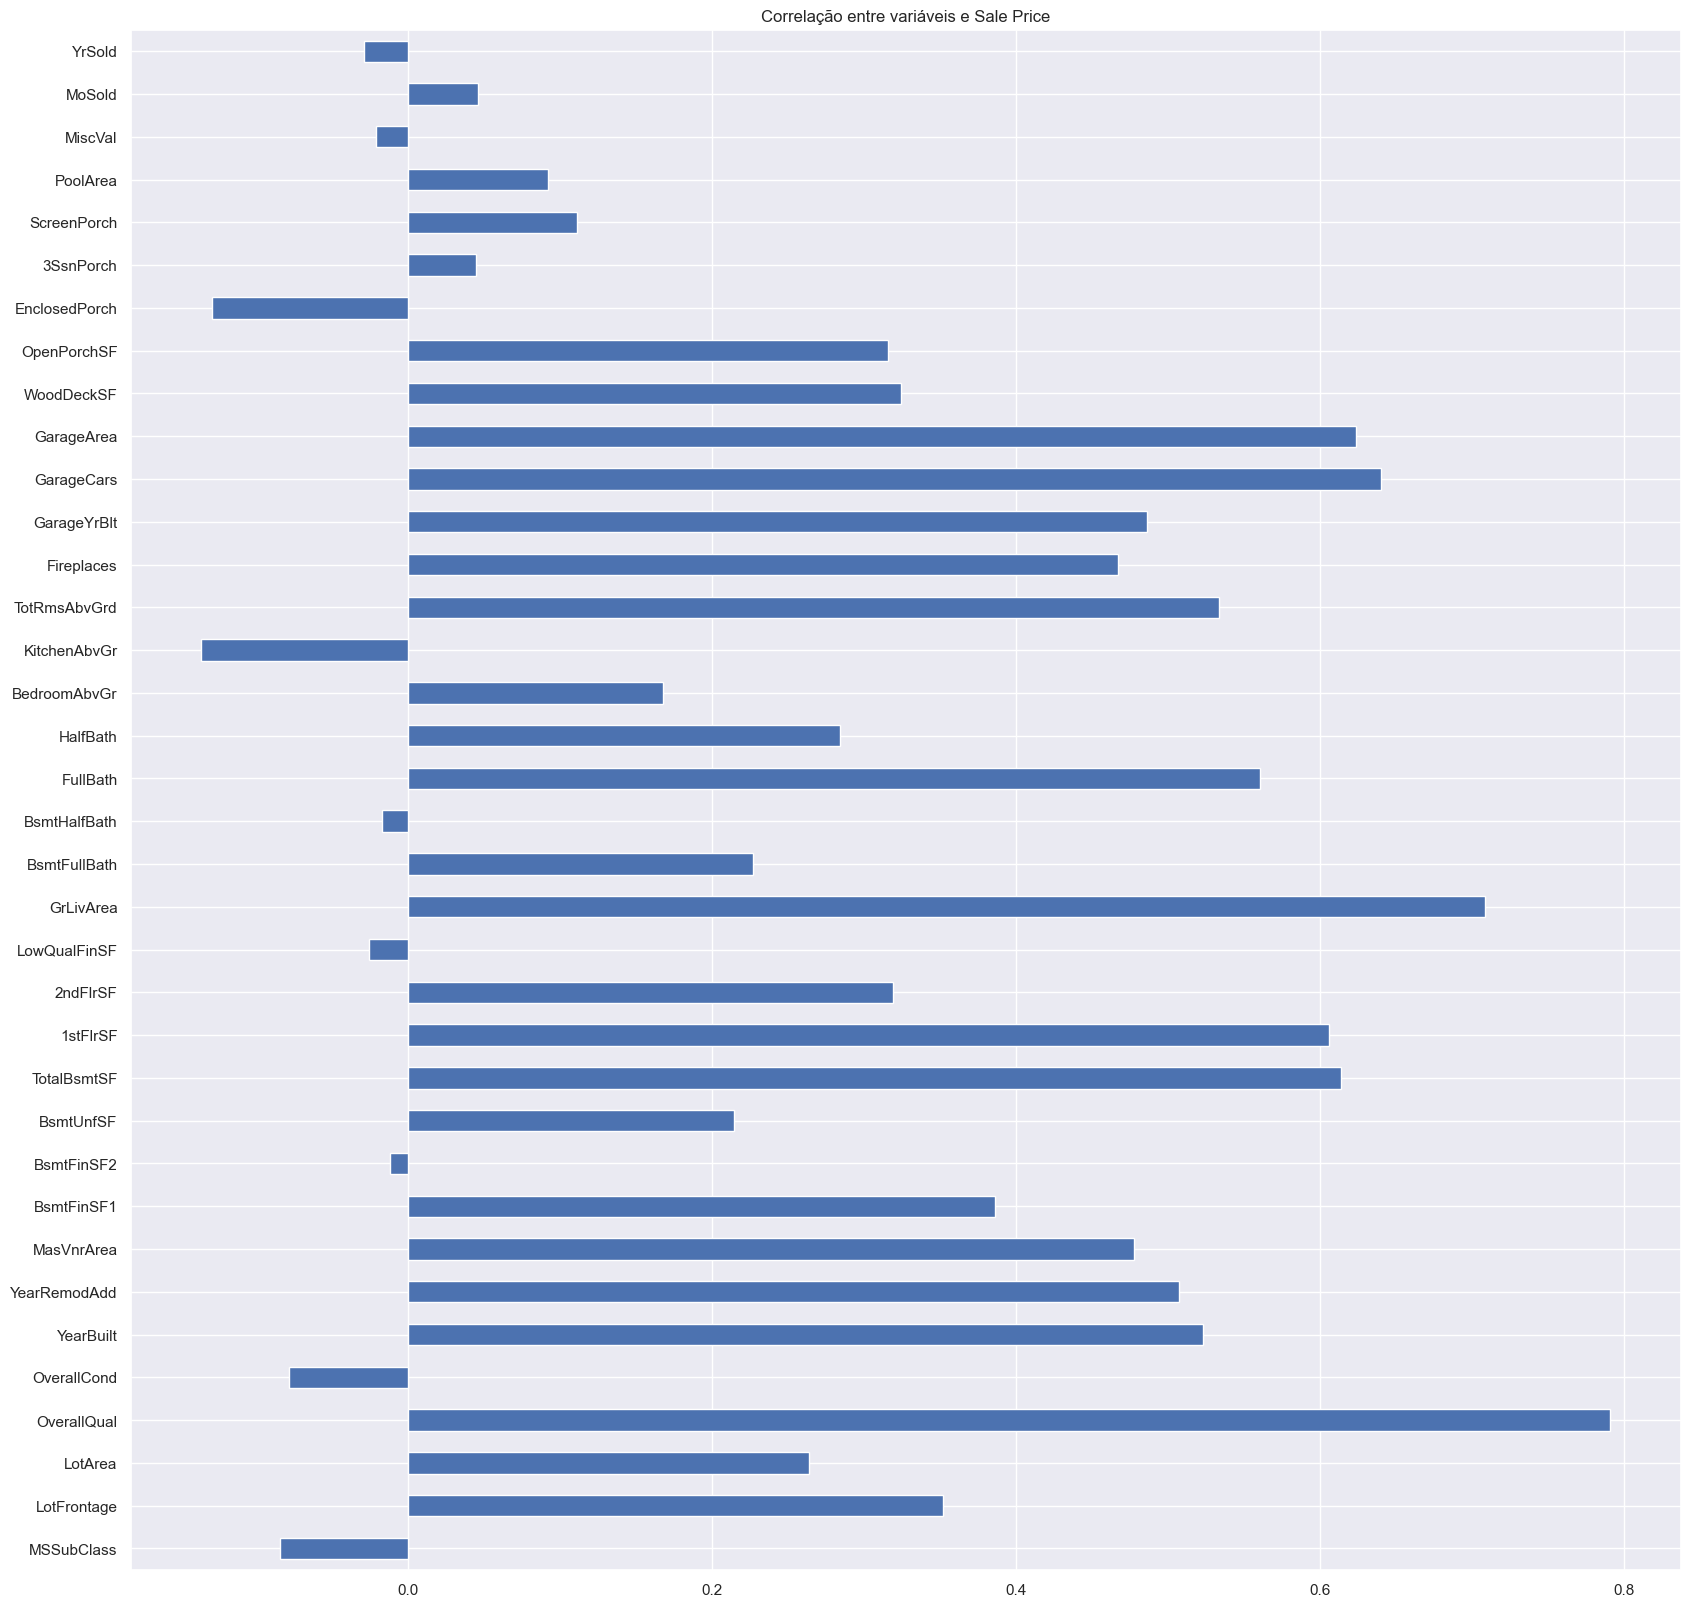

In [10]:
plt.figure(figsize=(20,20))

corr = corr[1:-1] # eliminar (SalePrice) e (Id) do dataset
corr.plot(kind='barh') # using pandas plot

plt.title("Correlação entre variáveis e Sale Price")

In [11]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Selecionando agora apenas as variáveis com correlação positiva, vejamos as relações entre as diferentes variáveis. 

<AxesSubplot:>

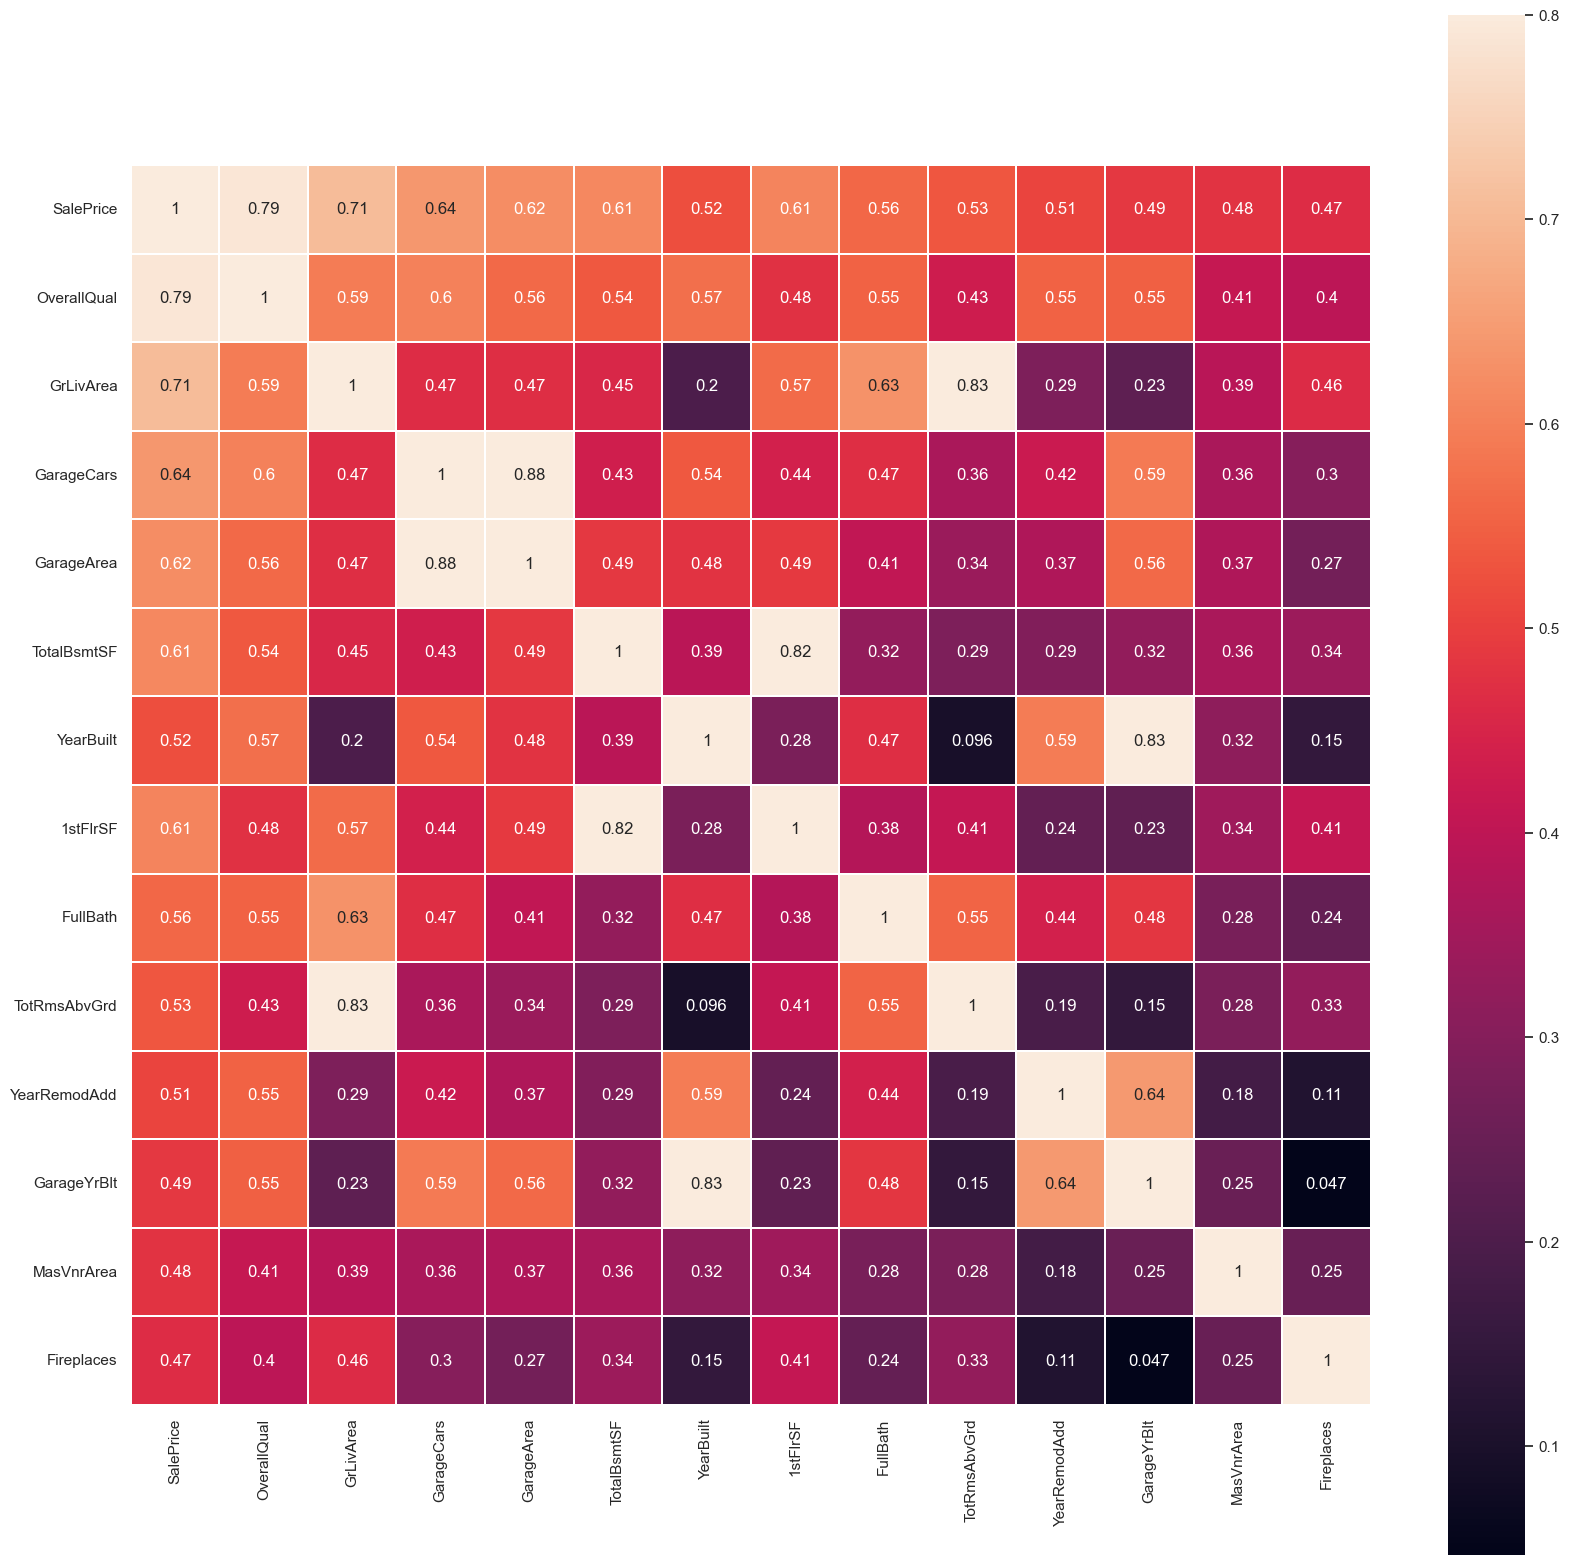

In [12]:
# Taking high correlated variables having positive correlation of 45% and above

high_corr_vars = ['SalePrice', 'OverallQual', 'GrLivArea', \
                  'GarageCars', 'GarageArea', 'TotalBsmtSF', \
                  'YearBuilt','1stFlrSF', 'FullBath', \
                  'TotRmsAbvGrd', 'YearRemodAdd', 'GarageYrBlt', \
                  'MasVnrArea', 'Fireplaces']

matrix = data[high_corr_vars].corr()

plt.figure(figsize=(20,20))

sns.heatmap(matrix,
            vmax=.8,
            linewidths=.01,
            square=True,
            annot=True)


Agora, seleciona-se algumas das variáveis com maior correlação com *SalePrice*

c:\Users\Utilizador\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


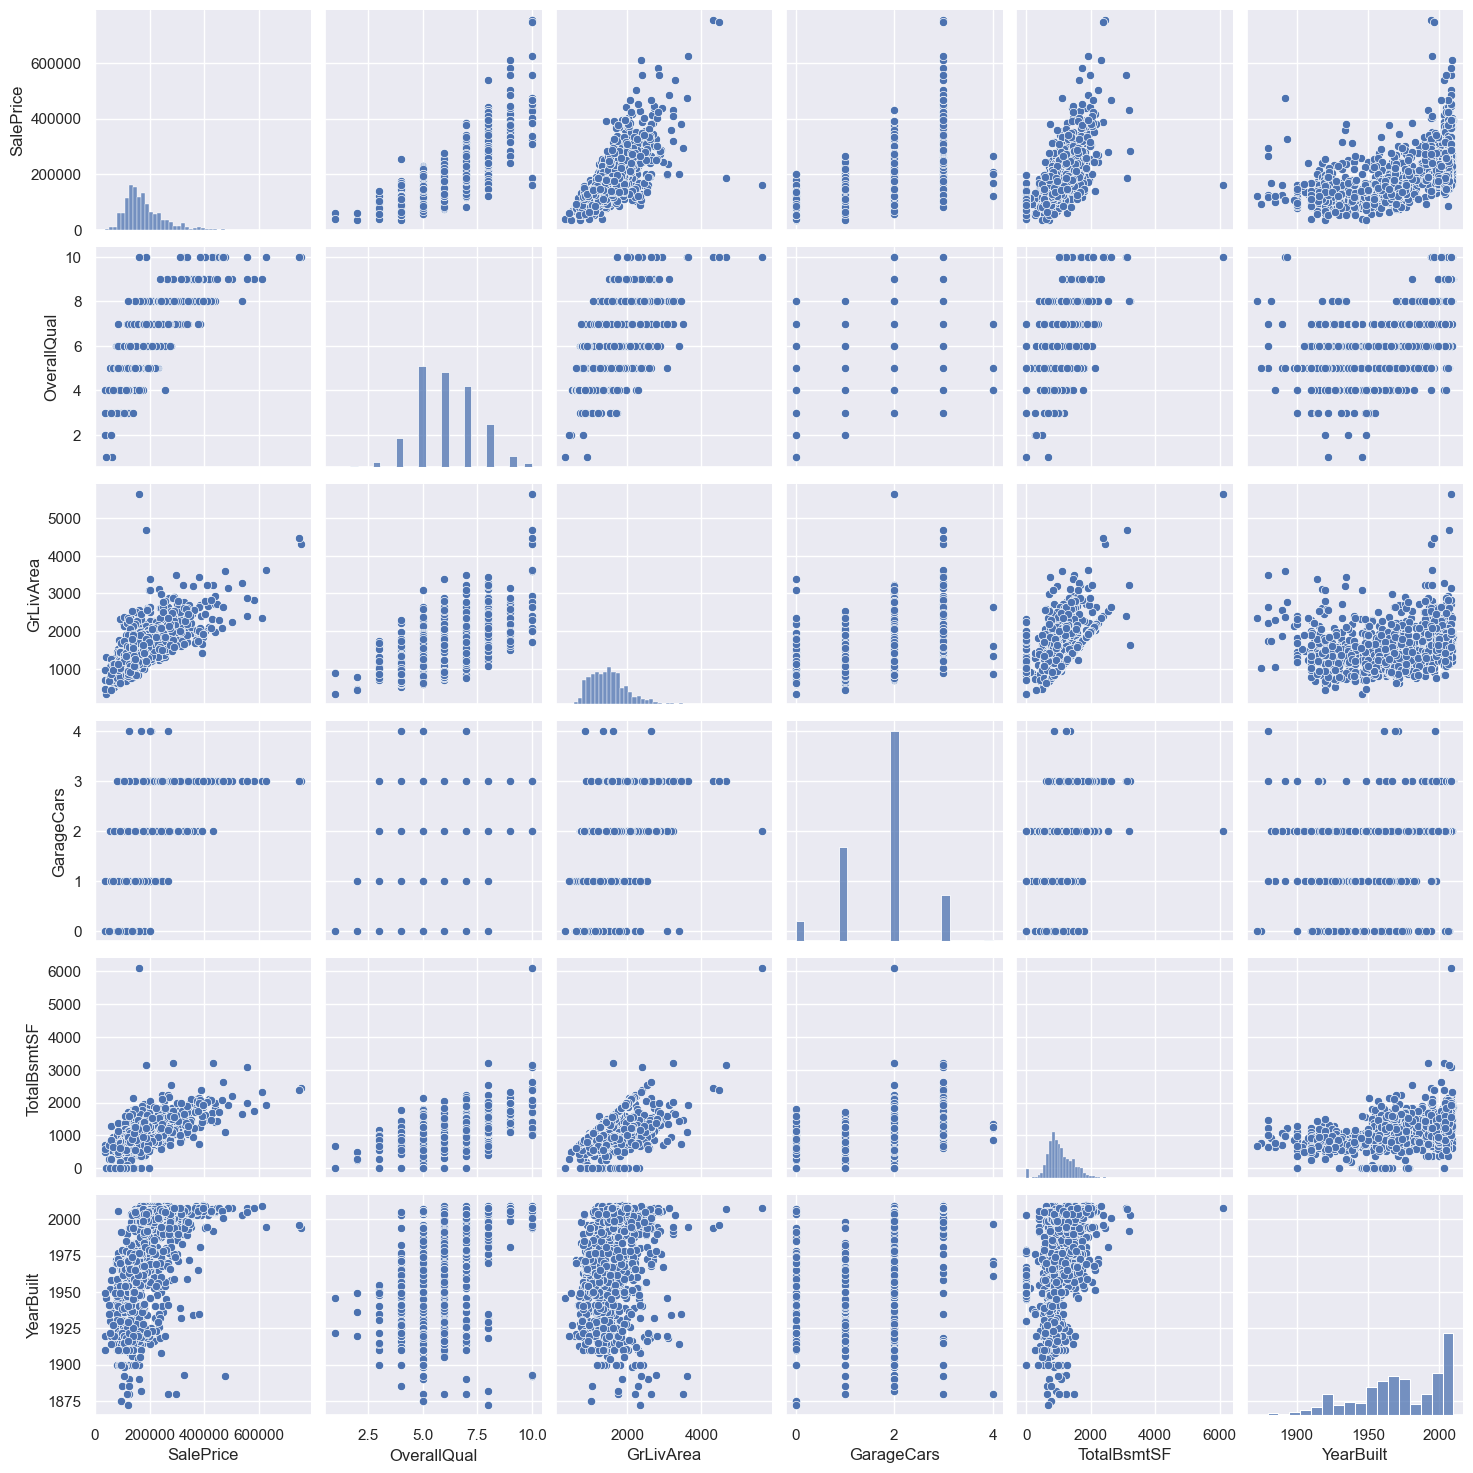

In [13]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt']

sns.pairplot(data[cols], size=2.5)

Com os gráficos de *scatter plot* anteriores, pode-se concluir os seguintes pontos:

* As variáveis *GrLivArea* e *TotalBsmtSF* estão relacionadas linearmente com a *target variable*. Quando estas variáveis sofrem um aumento no seu valor, *SalePrice* também aumenta
* As variáveis *OverallQual* e *YearBuilt* estão relacionadas positivamente com *SalePrice*

Para observar a relação entre *OverallQual* e *SalePrice*

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

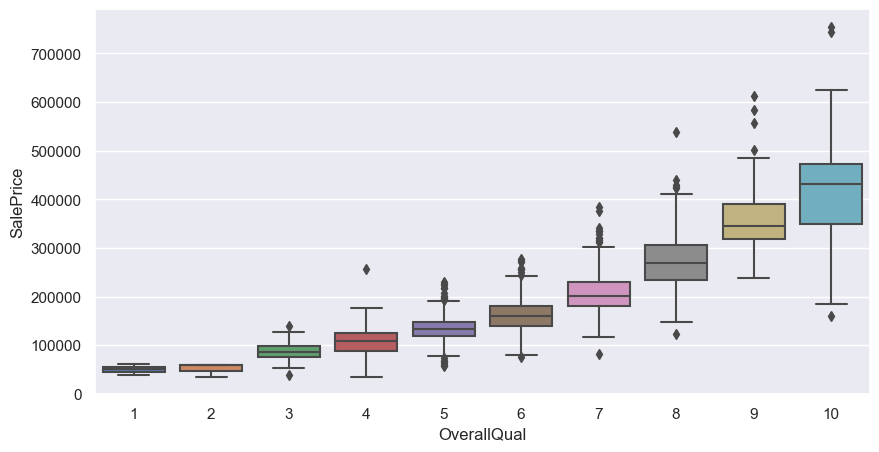

In [14]:
plt.figure(figsize=[10,5])

sns.boxplot(x='OverallQual', y="SalePrice", data=data)

### Missing Values

In [15]:
nTrain = data.shape[0]
nTest = test.shape[0]

y_train = data.SalePrice.values

all_data = pandas.concat((data, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
all_data.shape

(2919, 80)

In [16]:
# Listar variáveis com missing values

null_cols = all_data.columns[all_data.isnull().any()]

total_null_cols = all_data[null_cols].isnull().sum()

percent_null_cols = (all_data[null_cols].isnull().sum() / all_data[null_cols].isnull().count())

missing_data = pandas.concat([total_null_cols, percent_null_cols], axis=1, keys=['Total','Percent']).sort_values(by=['Percent'], ascending=False) 

print("MISSING VALUES")
missing_data

MISSING VALUES


,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageFinish,159,0.054471
GarageQual,159,0.054471
GarageCond,159,0.054471
GarageYrBlt,159,0.054471


REPRESENTAÇÃO VISUAL DAS PERCENTAGENS DE NULL VALUES


Text(0, 0.5, 'Percentagens')

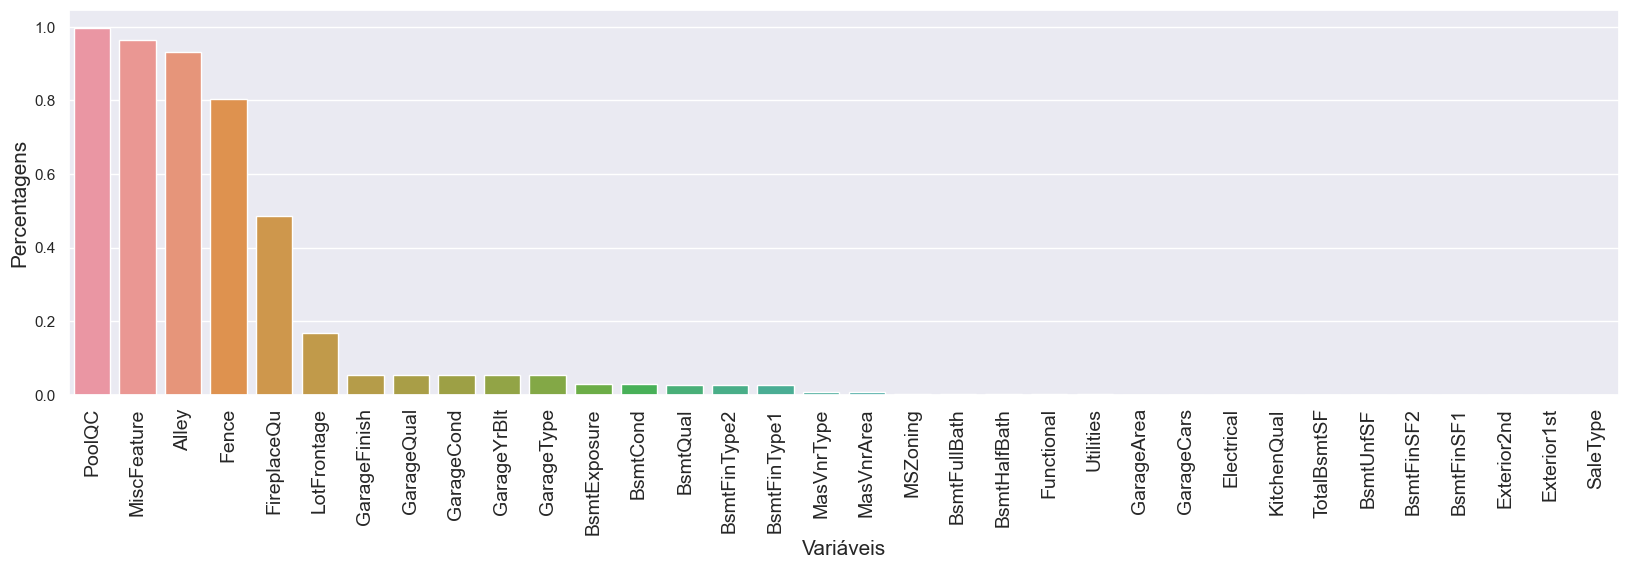

In [17]:
plt.figure(figsize=[20,5])
plt.xticks(rotation='90',fontsize=14)

sns.barplot(x=missing_data.index, y=missing_data.Percent)

print("REPRESENTAÇÃO VISUAL DAS PERCENTAGENS DE NULL VALUES")
plt.xlabel("Variáveis", fontsize=15)
plt.ylabel("Percentagens", fontsize=15)

#### Alteração dos Missing Values

##### PoolQC

In [18]:
# Unique vals 

all_data['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [19]:
# Change all null values to "None"

all_data['PoolQC'].fillna('None', inplace=True)

##### MiscFeature

In [20]:
all_data['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [21]:
all_data['MiscFeature'].fillna('None', inplace=True)

##### Alley

In [22]:
all_data['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [23]:
all_data['Alley'].fillna('None', inplace=True)

##### Fence 

In [24]:
all_data['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [25]:
all_data['Fence'].fillna('None', inplace=True)

##### FireplaceQu

In [26]:
all_data['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [27]:
all_data['FireplaceQu'].fillna('None', inplace=True)

##### LotFrontage



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

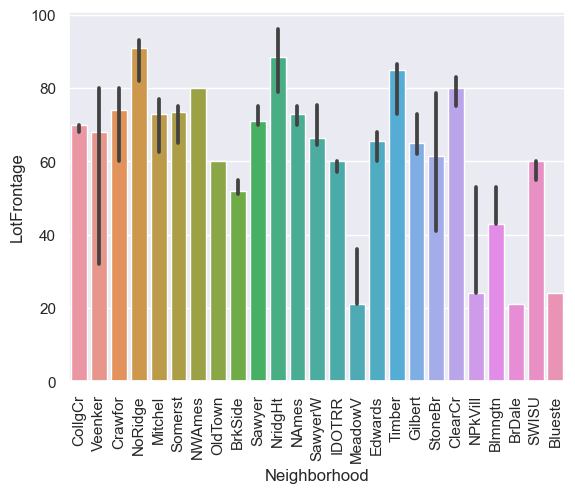

In [28]:
sns.barplot(data=data, x='Neighborhood', y='LotFrontage', estimator=np.median)

plt.xticks(rotation=90)

In [29]:
all_data['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.,  26.,  25., 119.,  31.,  28., 117., 113., 125., 135., 136.,
        22., 123., 195., 155., 126., 200., 131., 133.])

In [30]:
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

all_data['LotFrontage'].unique()

array([ 65. ,  80. ,  68. ,  60. ,  84. ,  85. ,  75. ,  51. ,  50. ,
        70. ,  72. ,  91. ,  73. ,  66. , 101. ,  57. ,  44. , 110. ,
        98. ,  47. , 108. , 112. ,  74. , 115. ,  67. ,  61. ,  48. ,
        33. ,  64. ,  52. , 100. ,  24. ,  89. ,  63. ,  76. ,  81. ,
        95. ,  69. ,  21. ,  32. ,  78. , 121. , 122. ,  40. , 105. ,
        77. ,  94. ,  34. ,  90. ,  80.5,  55. ,  88. ,  82. ,  71. ,
       120. , 107. ,  92. , 134. ,  62. ,  86. , 141. ,  97. ,  72.5,
        54. ,  41. ,  79. , 174. ,  99. ,  83. ,  43. , 103. ,  93. ,
        30. , 129. , 140. ,  35. ,  37. , 118. ,  87. , 116. , 150. ,
       111. ,  49. ,  96. ,  59. ,  36. ,  56. , 102. ,  58. ,  38. ,
       109. , 130. ,  53. , 137. ,  45. , 106. , 104. ,  42. ,  39. ,
       144. , 114. , 128. , 149. , 313. , 168. , 182. , 138. , 160. ,
       152. , 124. , 153. ,  46. ,  26. ,  25. , 119. ,  31. ,  28. ,
       117. , 113. , 125. , 135. , 136. ,  22. , 123. , 195. , 155. ,
       126. , 200. ,

##### GarageType, GarageFinish, GarageQual e GarageCond

In [31]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    print(all_data[col].unique())

['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
['RFn' 'Unf' 'Fin' nan]
['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
['TA' 'Fa' nan 'Gd' 'Po' 'Ex']


In [32]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col].fillna('None', inplace=True)

##### GarageYrBlt, GarageArea e GarageCars

In [33]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col].fillna(0, inplace=True)

##### BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 e BsmtFinType2

In [34]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col].fillna(0, inplace=True)

##### BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath e BsmtHalfBath

In [35]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col].fillna(0, inplace=True)

##### MasVnrArea e MasVnrType

In [36]:
all_data['MasVnrType'].fillna("None", inplace=True)

all_data['MasVnrArea'].fillna(0, inplace=True)

##### MSZoning, Utilities, Functional, Exterior2nd, Exterior1st, KitchenQual, Electrical e SaleType

In [37]:
for col in ('MSZoning', 'Utilities', 'Functional', 'Exterior2nd', 'Exterior1st', 'KitchenQual', 'Electrical', 'SaleType'):
    all_data[col].fillna(all_data[col].mode()[0], inplace=True)

#### Recheck de Missing Values

Para ter a certeza que todos os NULL values foram tratados:

In [38]:
null_cols = all_data.columns[all_data.isnull().any()]

null_cols

Index([], dtype='object')

### Remoção de Outliers

OUTLIERS


Text(0, 0.5, 'Ocorrências')

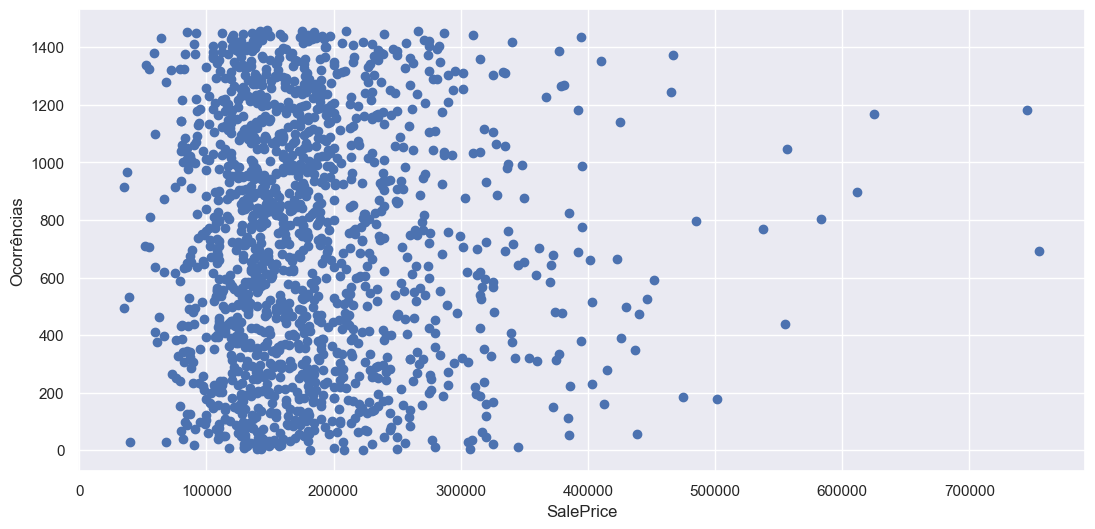

In [39]:
plt.figure(figsize=[13,6])
plt.scatter(data['SalePrice'].values, range(data.shape[0]))

print("OUTLIERS")

plt.xlabel("SalePrice")
plt.ylabel("Ocorrências")

Text(0, 0.5, 'Ocorrências')

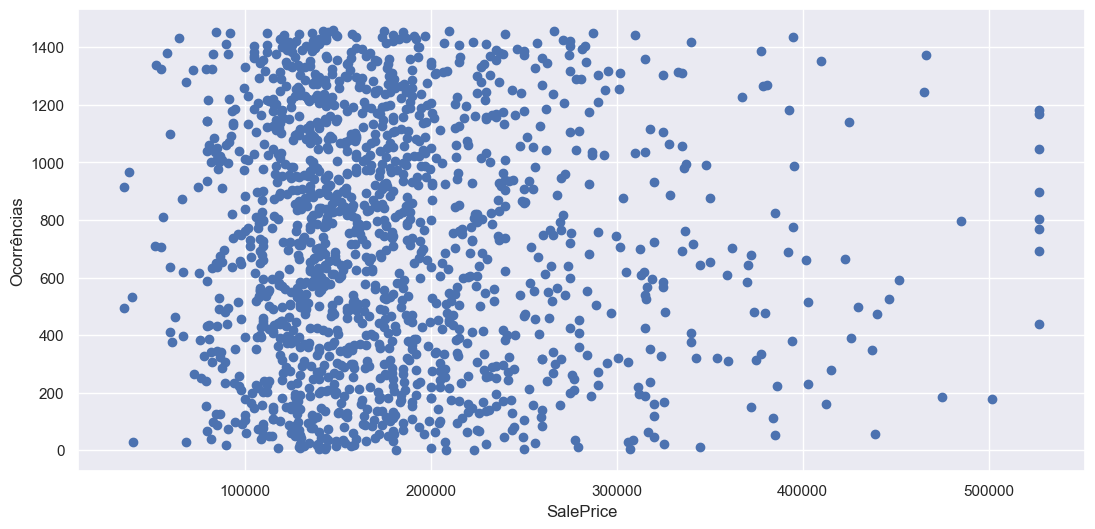

In [40]:
# REGULARIZAR DE OUTLIERS
upperLim = np.percentile(data.SalePrice.values, 99.5)
data[data.SalePrice>upperLim] = upperLim

# GRAPH
plt.figure(figsize=[13,6])
plt.scatter(data['SalePrice'].values, range(data.shape[0]))
plt.xlabel("SalePrice")
plt.ylabel("Ocorrências")

### Converter variáveis categoricas

Irá ser necessário converter as variáveis categóricas referidas anteriormente em dummy-variables. É um passo importante, uma vez que todos os modelos requerem que todos os inputs/output sejam numéricos, então para prevenir que isso aconteca e tentar obter os melhores resultados possíveis, iremos utilizar o pandas e converter essas variáveis categóricas em dummy-variables.


In [41]:
all_data = pandas.get_dummies(all_data)

all_data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2915,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,0,0,0,1,1,0,0,0,0,0
2916,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,0,0,0,1,1,0,0,0,0,0
2917,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0,0,0,1,0,0,0,0,1,0


### Atualizar os datasets

In [42]:
train = all_data[:nTrain]
test = all_data[nTrain:]

### Verificação da existência de variáveis categóricas

In [43]:
obj = ['O']

train_objs = train.select_dtypes(include=obj)
test_objs = test.select_dtypes(include=obj)

print(f"TRAINING: {train_objs.columns}\nTESTING : {test_objs.columns}")

TRAINING: Index([], dtype='object')
TESTING : Index([], dtype='object')


In [44]:
train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,1,0,0,0,0,1,0


In [45]:
test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1460,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,1,0,0,0,0,1,0
1461,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,1,0,0,0,0,1,0
1462,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,1,0,0,0,0,1,0
1463,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,0,1,0,0,0,0,1,0
1464,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,0,1,0,0,0,0,1,0


## Modelling

Nesta secção iremos utilizar alguns modelos escolhidos como o Gradient Boosting e XGBoost de forma a treinar os datasets e de seguida tentar criar uma previsão. Iremos também calcular RMSE(Root Mean Square Error) para as previsões, escolhemos RMSE por ser mais usado do que MSE, este calcula a diferença entre os valores previstos pelo modelo e os valores observados.

In [46]:
x_train = train.drop(['Id'], axis=1)

x_test = test.drop(['Id'], axis=1)

### Gradient Boosting

In [47]:
model_gradBoosting = GradientBoostingRegressor(n_estimators=2000,learning_rate=0.05,max_depth=4,max_features='sqrt')
model_gradBoosting.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=4, max_features='sqrt',
                          n_estimators=2000)

### XGBoost

In [48]:
model_XGB = xgb.XGBRegressor(n_estimators=2200, max_depth=7, learning_rate=0.05, subsample=0.7, colsample_bytree=1)
model_XGB.fit(x_train,y_train)

c:\Users\Utilizador\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=2200, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

### Previsão no Training Data

In [49]:
boost_train = model_gradBoosting.predict(x_train)

xgb_train = model_XGB.predict(x_train)

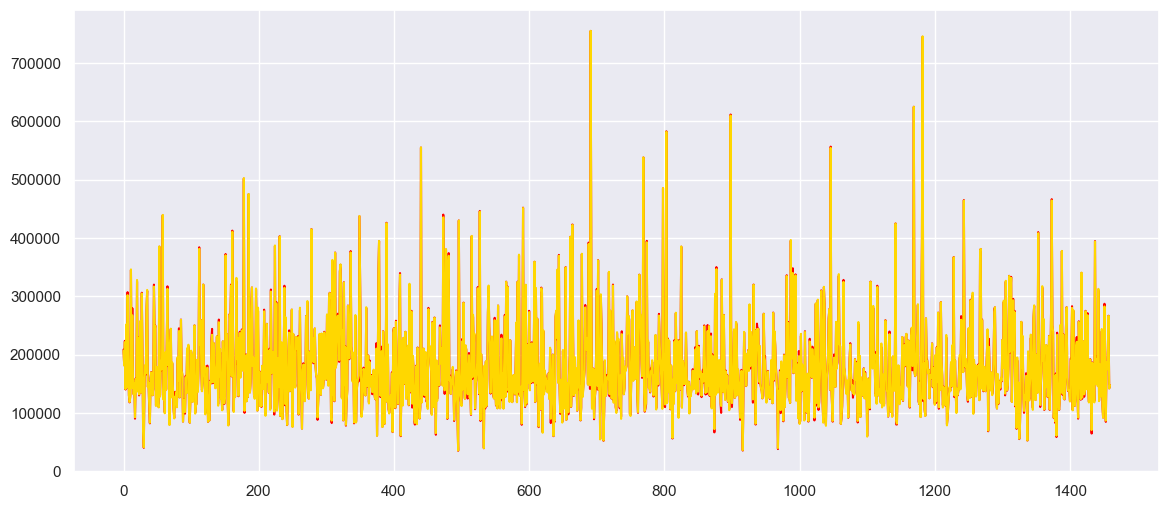

In [50]:
plt.figure(figsize=(14,6))
plt.plot(y_train, color='red')
plt.plot(boost_train, color='gold')
plt.show()

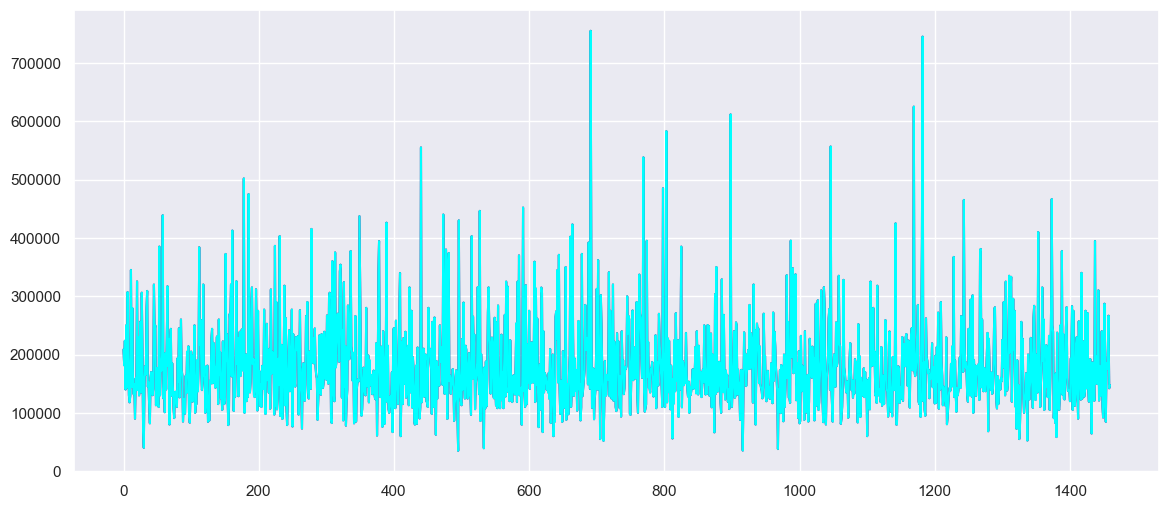

In [51]:
plt.figure(figsize=(14,6))
plt.plot(y_train, color='purple')
plt.plot(xgb_train, color='cyan')
plt.show()

### Previsão no Test Data

In [52]:
boost_test = model_gradBoosting.predict(x_test)

xgb_test = model_XGB.predict(x_test)

## Gravar os Resultados em CSV

In [53]:
models_train = {"gradient_boosting":boost_train, "xgboost":xgb_train}
models_test = {"gradient_boosting":boost_test, "xgboost":xgb_test}

for key,value in models_train.items():
    pandas.DataFrame({"Id":train["Id"],"SalePrice":boost_train}).to_csv(f'../../Predictions/Housing/predict_train_house_{key}.csv',index=False)
    
for key,value in models_test.items():
    pandas.DataFrame({"Id":test["Id"],"SalePrice":boost_test}).to_csv(f'../../Predictions/Housing/predict_test_house_{key}.csv',index=False)